Imports related function

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras .preprocessing.sequence import pad_sequences

In [2]:
import string
import numpy as np
import pandas as pd


Load dataset

In [3]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8 \
    -O /tmp/songdata.csv

--2023-11-27 06:01:49--  https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8
Resolving drive.google.com (drive.google.com)... 74.125.26.113, 74.125.26.102, 74.125.26.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.26.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9c5s2cotdrjms468qv3cc0l09g36019n/1701064875000/11118900490791463723/*/1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8?uuid=b3c871af-b47b-4a09-b98b-232caa25e625 [following]
--2023-11-27 06:01:51--  https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9c5s2cotdrjms468qv3cc0l09g36019n/1701064875000/11118900490791463723/*/1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8?uuid=b3c871af-b47b-4a09-b98b-232caa25e625
Resolving doc-04-ak-docs.googleusercontent.com (doc-04-ak-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-04-ak

In [4]:
dataset = pd.read_csv('/tmp/songdata.csv', dtype=str)[:10]
dataset

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \nYou're enc..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun \nCouldn't sle...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \nI'm sitting all al...


In [5]:
def tokenize_corpus(corpus, num_word=-1):
  #fit a tokenizer on the corpus
  if num_word>-1:
    tokenizer= Tokenizer(num_word= num_word)
  else:
    tokenizer= Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer

In [6]:
def create_lyrics_corpus(dataset, field):
  #remove all punctuation
  dataset[field] = dataset[field].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
  #dataset[field]= dataset[field].str.replace("[{}]".format(string.punctuation), "")
  #make it lower case
  dataset[field] = dataset[field].str.lower()
  #make one long string to split by line
  lyrics= dataset[field].str.cat()
  corpus= lyrics.split("\n")
  #remove any trailing whitespace
  for l in range(len(corpus)):
    corpus[l]= corpus[l].rstrip()
  #remove any empty lines
  corpus= [l for l in corpus if l != ""]

  return corpus

In [7]:
corpus= create_lyrics_corpus(dataset, "text")
print(corpus)
tokenizer= tokenize_corpus(corpus)

['look at her face its a wonderful face', 'and it means something special to me', 'look at the way that she smiles when she sees me', 'how lucky can one fellow be', 'shes just my kind of girl she makes me feel fine', 'who could ever believe that she could be mine', 'shes just my kind of girl without her im blue', 'and if she ever leaves me what could i do what could i do', 'and when we go for a walk in the park', 'and she holds me and squeezes my hand', 'well go on walking for hours and talking', 'about all the things that we plan', 'shes just my kind of girl she makes me feel fine', 'who could ever believe that she could be mine', 'shes just my kind of girl without her im blue', 'and if she ever leaves me what could i do what could i do', 'take it easy with me please', 'touch me gently like a summer evening breeze', 'take your time make it slow', 'andante andante', 'just let the feeling grow', 'make your fingers soft and light', 'let your body be the velvet of the night', 'touch my so

In [8]:
total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(total_words)

{'you': 1, 'i': 2, 'and': 3, 'a': 4, 'me': 5, 'the': 6, 'is': 7, 'my': 8, 'to': 9, 'ma': 10, 'it': 11, 'of': 12, 'im': 13, 'your': 14, 'love': 15, 'so': 16, 'as': 17, 'that': 18, 'in': 19, 'andante': 20, 'boomaboomerang': 21, 'make': 22, 'on': 23, 'oh': 24, 'for': 25, 'but': 26, 'new': 27, 'bang': 28, 'its': 29, 'be': 30, 'like': 31, 'know': 32, 'now': 33, 'how': 34, 'could': 35, 'youre': 36, 'sing': 37, 'never': 38, 'no': 39, 'chiquitita': 40, 'can': 41, 'we': 42, 'song': 43, 'had': 44, 'good': 45, 'youll': 46, 'she': 47, 'just': 48, 'girl': 49, 'again': 50, 'will': 51, 'take': 52, 'please': 53, 'let': 54, 'am': 55, 'eyes': 56, 'was': 57, 'always': 58, 'cassandra': 59, 'blue': 60, 'time': 61, 'dont': 62, 'were': 63, 'return': 64, 'once': 65, 'then': 66, 'sorry': 67, 'cryin': 68, 'over': 69, 'feel': 70, 'ever': 71, 'believe': 72, 'what': 73, 'do': 74, 'go': 75, 'all': 76, 'out': 77, 'think': 78, 'every': 79, 'leave': 80, 'look': 81, 'at': 82, 'way': 83, 'one': 84, 'music': 85, 'down': 

Create Sequences and Label

In [9]:
sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  #print(token_list)
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
   # print("n gram")
    #print(n_gram_sequence)
    sequences.append(n_gram_sequence)


In [10]:
print(sequences)
print(len(sequences))

[[81, 82], [81, 82, 142], [81, 82, 142, 197], [81, 82, 142, 197, 29], [81, 82, 142, 197, 29, 4], [81, 82, 142, 197, 29, 4, 287], [81, 82, 142, 197, 29, 4, 287, 197], [3, 11], [3, 11, 288], [3, 11, 288, 198], [3, 11, 288, 198, 289], [3, 11, 288, 198, 289, 9], [3, 11, 288, 198, 289, 9, 5], [81, 82], [81, 82, 6], [81, 82, 6, 83], [81, 82, 6, 83, 18], [81, 82, 6, 83, 18, 47], [81, 82, 6, 83, 18, 47, 290], [81, 82, 6, 83, 18, 47, 290, 95], [81, 82, 6, 83, 18, 47, 290, 95, 47], [81, 82, 6, 83, 18, 47, 290, 95, 47, 199], [81, 82, 6, 83, 18, 47, 290, 95, 47, 199, 5], [34, 291], [34, 291, 41], [34, 291, 41, 84], [34, 291, 41, 84, 292], [34, 291, 41, 84, 292, 30], [114, 48], [114, 48, 8], [114, 48, 8, 115], [114, 48, 8, 115, 12], [114, 48, 8, 115, 12, 49], [114, 48, 8, 115, 12, 49, 47], [114, 48, 8, 115, 12, 49, 47, 200], [114, 48, 8, 115, 12, 49, 47, 200, 5], [114, 48, 8, 115, 12, 49, 47, 200, 5, 70], [114, 48, 8, 115, 12, 49, 47, 200, 5, 70, 201], [202, 35], [202, 35, 71], [202, 35, 71, 72], [

In [11]:
# Pad sequences for equal input length
max_sequence_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))
# Split sequences between the "input" sequence and "output" predicted word
input_sequences, labels = sequences[:,:-1], sequences[:,-1]
print(input_sequences)
print(labels)
print(len(labels))
# One-hot encode the labels
print(total_words)
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

[[  0   0   0 ...   0   0  81]
 [  0   0   0 ...   0  81  82]
 [  0   0   0 ...  81  82 142]
 ...
 [  0   0   0 ...   0   0  13]
 [  0   0   0 ...   0  13  68]
 [  0   0   0 ...  13  68  69]]
[ 82 142 197 ...  68  69   1]
1982
495


In [12]:
# Check out how some of our data is being stored
# The Tokenizer has just a single index per word
print(tokenizer.word_index['know'])
print(tokenizer.word_index['feeling'])
# Input sequences will have multiple indexes
print(input_sequences[5])
print(input_sequences[6])
# And the one hot labels will be as long as the full spread of tokenized words
print(one_hot_labels[5])
print(one_hot_labels[6])

32
97
[  0   0   0   0   0   0   0   0   0   0   0   0   0  81  82 142 197  29
   4]
[  0   0   0   0   0   0   0   0   0   0   0   0  81  82 142 197  29   4
 287]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Train a Text Generation Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(input_sequences, one_hot_labels, epochs=200, verbose=1)

Epoch 1/200
62/62 [==============================] - 14s 70ms/step - loss: 6.0084 - accuracy: 0.0227
Epoch 2/200
62/62 [==============================] - 2s 29ms/step - loss: 5.4444 - accuracy: 0.0373
Epoch 3/200
62/62 [==============================] - 0s 8ms/step - loss: 5.3708 - accuracy: 0.0399
Epoch 4/200
62/62 [==============================] - 1s 13ms/step - loss: 5.3231 - accuracy: 0.0399
Epoch 5/200
62/62 [==============================] - 0s 8ms/step - loss: 5.2520 - accuracy: 0.0399
Epoch 6/200
62/62 [==============================] - 0s 8ms/step - loss: 5.1823 - accuracy: 0.0378
Epoch 7/200
62/62 [==============================] - 1s 16ms/step - loss: 5.1169 - accuracy: 0.0399
Epoch 8/200
62/62 [==============================] - 1s 10ms/step - loss: 5.0504 - accuracy: 0.0469
Epoch 9/200
62/62 [==============================] - 1s 14ms/step - loss: 4.9841 - accuracy: 0.0616
Epoch 10/200
62/62 [==============================] - 1s 19ms/step - loss: 4.8905 - accuracy: 0.0661
E

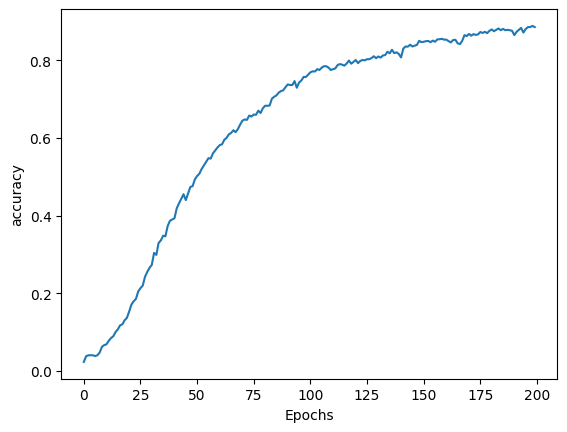

In [14]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [17]:
seed_text = "im feeling chills"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)
#print(output_word)

1/1 [==============================] - 0s 36ms/step
im feeling chills me to the bone come on give yourself will around a cassandra i didnt had before such a would joe bedumbbedumbdumb bedumbbedumbdumb lousy rotten show lifes lifes question final darkest ground bedumbbedumbdumb ground ground ground knew final tedious tedious ways scars ways break break break care knew final break break break final tedious tedious ways bed break scars break break break break care knew final tedious tedious ways bed break break break ground knew final eye scars break break break break care care knew final tedious tedious ways break break break break lifes ways ground lifes tie ground ground ground
